# 📊 IoT Dataset – EDA Notebook

In [5]:

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# --- Load Dataset ---

In [8]:

df = pd.read_csv('../data/smart_manufacturing_data.csv')  # Adjust path if needed
print("Shape:", df.shape)
df.head()



Shape: (100000, 13)


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


In [45]:
print(df['failure_type'].unique())

['Normal' 'Vibration Issue' 'Overheating' 'Pressure Drop'
 'Electrical Fault']


In [36]:

if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

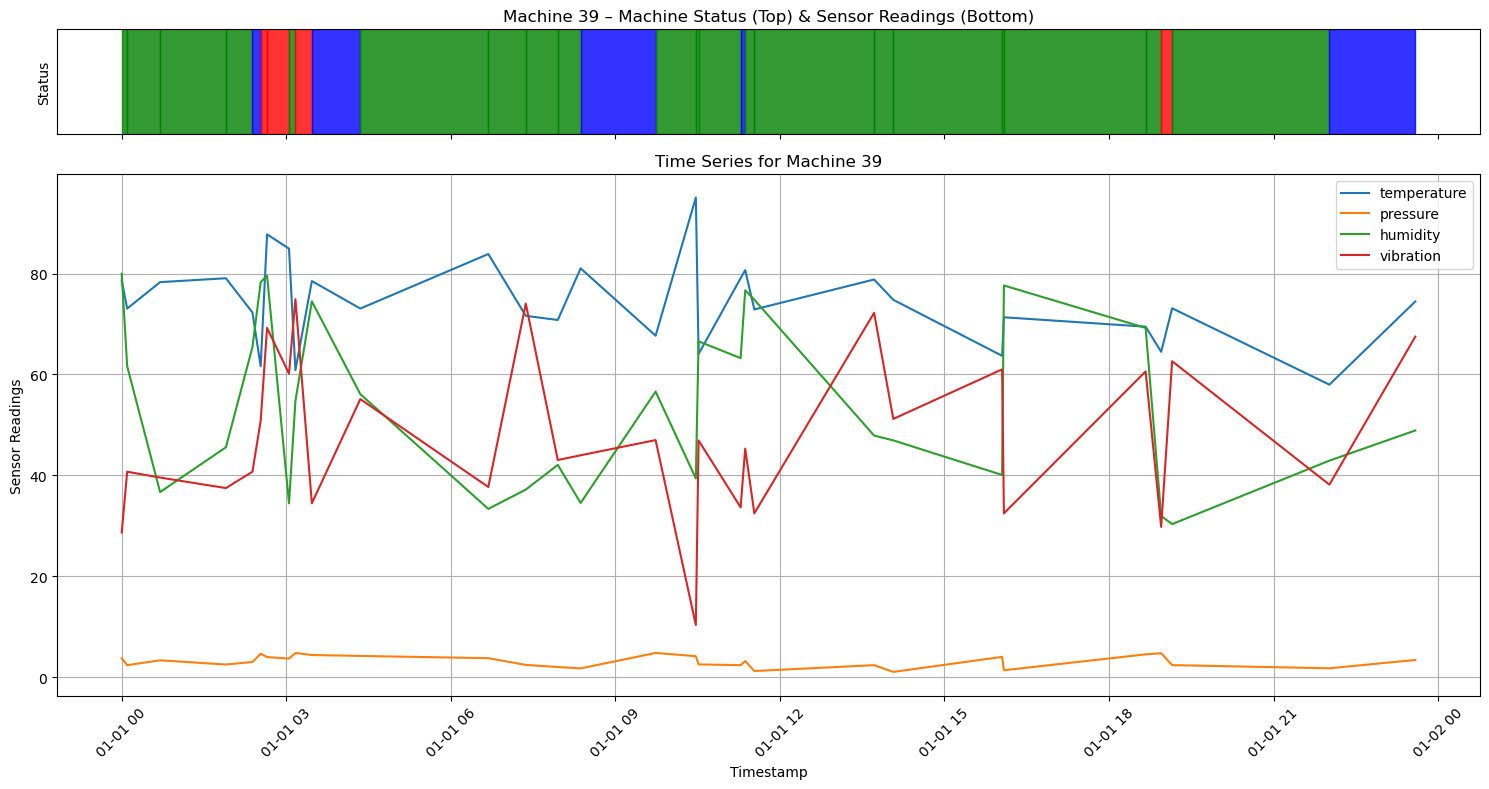

In [ ]:
# Choose a specific machine to explore
machine_id = 39  # Change

# Filter data for this machine
machine_df = df[df['machine_id'] == machine_id]

# Narrow down to a specific date/time range
zoomed_df = machine_df.loc[(machine_df.index >= '2025-01-01') &
                           (machine_df.index <= '2025-01-02')]
# Define colors for each status
status_colors = {0: 'blue', 1: 'green', 2: 'red'} # status_colors[status]

# Define colors for each maintenance required
maintenance_colors = {0: 'green', 1: 'red'} # maintenance_colors[maintenance_require]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True,
                       gridspec_kw={'height_ratios': [0.2, 1]})  # Top = status, bottom = metrics

# --- 1. STATUS STRIPE ---
for i in range(len(zoomed_df) - 1):
    start = zoomed_df.index[i]
    end = zoomed_df.index[i + 1]
    status = zoomed_df['machine_status'].iloc[i]
    ax[0].axvspan(start, end, color=status_colors[status], alpha=0.8)

ax[0].set_yticks([])
ax[0].set_ylabel('Status')
ax[0].set_title(f'Machine {machine_id} – Machine Status (Top) & Sensor Readings (Bottom)')
ax[0].grid(False)

# --- 2. SENSOR READINGS ---
# Plot

for i, feature in enumerate(['temperature', 'pressure', 'humidity', 'vibration']):#, 'energy_consumption'
    ax[1].plot(zoomed_df.index, zoomed_df[feature], label=feature)

plt.title(f"Time Series for Machine {machine_id}")
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# --- Basic Info ---
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 100000 non-null  object 
 1   machine_id                100000 non-null  int64  
 2   temperature               100000 non-null  float64
 3   vibration                 100000 non-null  float64
 4   humidity                  100000 non-null  float64
 5   pressure                  100000 non-null  float64
 6   energy_consumption        100000 non-null  float64
 7   machine_status            100000 non-null  int64  
 8   anomaly_flag              100000 non-null  int64  
 9   predicted_remaining_life  100000 non-null  int64  
 10  failure_type              100000 non-null  object 
 11  downtime_risk             100000 non-null  float64
 12  maintenance_required      100000 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usa

,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.499330,75.015625,50.012270,54.995401,3.000405,2.747064,1.002050,0.089160,234.269160,0.089155,0.196970
std,14.389439,10.031884,14.985444,14.437960,1.152399,1.297865,0.446193,0.284976,150.063062,0.284961,0.397711
min,1.000000,35.550000,-17.090000,30.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,13.000000,68.267500,39.970000,42.520000,2.000000,1.630000,1.000000,0.000000,97.000000,0.000000,0.000000
50%,25.000000,75.060000,49.960000,54.980000,3.010000,2.740000,1.000000,0.000000,230.000000,0.000000,0.000000
75%,38.000000,81.750000,60.100000,67.500000,4.000000,3.870000,1.000000,0.000000,365.000000,0.000000,0.000000
max,50.000000,121.940000,113.800000,80.000000,5.000000,5.000000,2.000000,1.000000,499.000000,1.000000,1.000000


In [9]:
# --- Check for Missing Values ---
print("\nMissing values:")
print(df.isnull().sum())




Missing values:
timestamp                   0
machine_id                  0
temperature                 0
vibration                   0
humidity                    0
pressure                    0
energy_consumption          0
machine_status              0
anomaly_flag                0
predicted_remaining_life    0
failure_type                0
downtime_risk               0
maintenance_required        0
dtype: int64


In [13]:
# --- Class Balance (e.g., status column) ---
if 'machine_status' in df.columns:
    print("\nClass distribution:")
    print(df['machine_status'].value_counts())




Class distribution:
machine_status
1    80091
2    10057
0     9852
Name: count, dtype: int64


In [14]:
# --- Timestamp Check (optional) ---
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)



# --- Visualize Sensor Trends (First 3 Sensors) ---

In [21]:

sensor_cols = [col for col in df.columns][1:6]


print("Sensor columns:", sensor_cols)


Sensor columns: ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


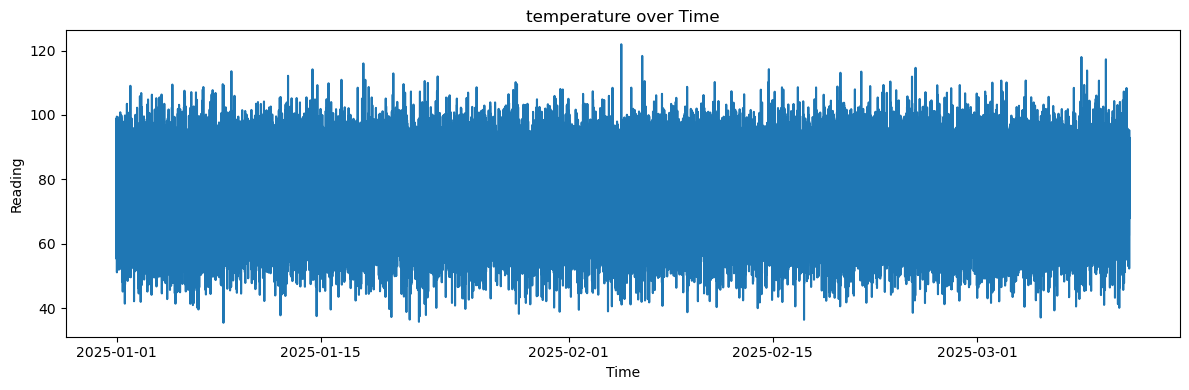

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


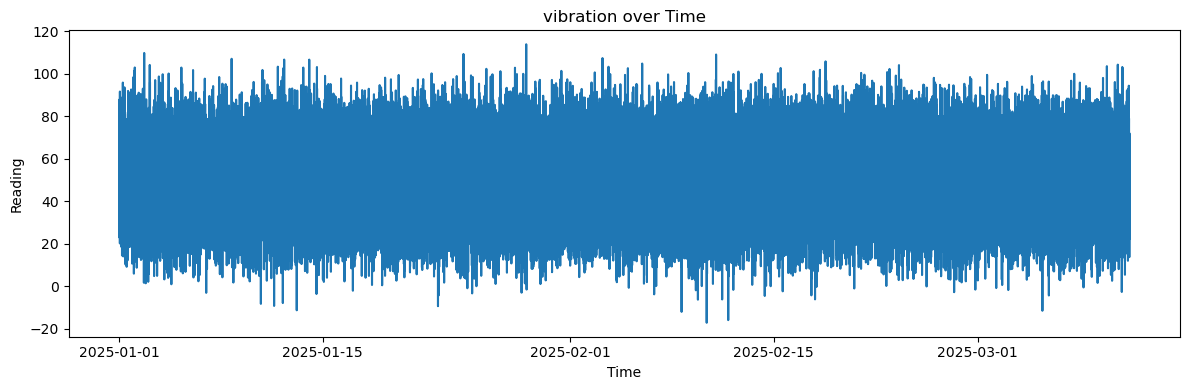

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


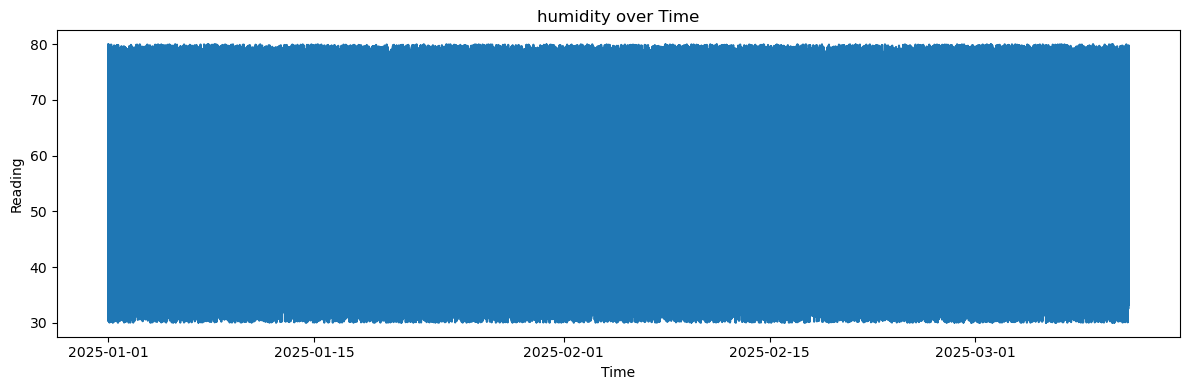

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


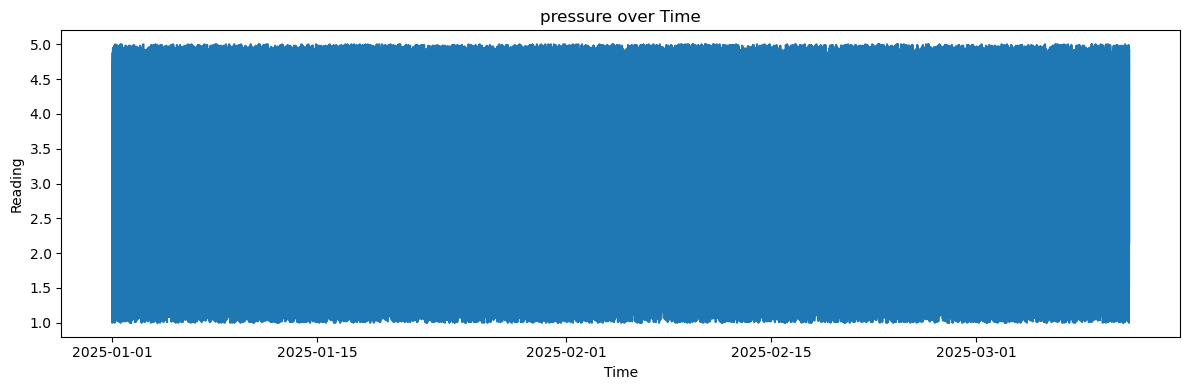

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


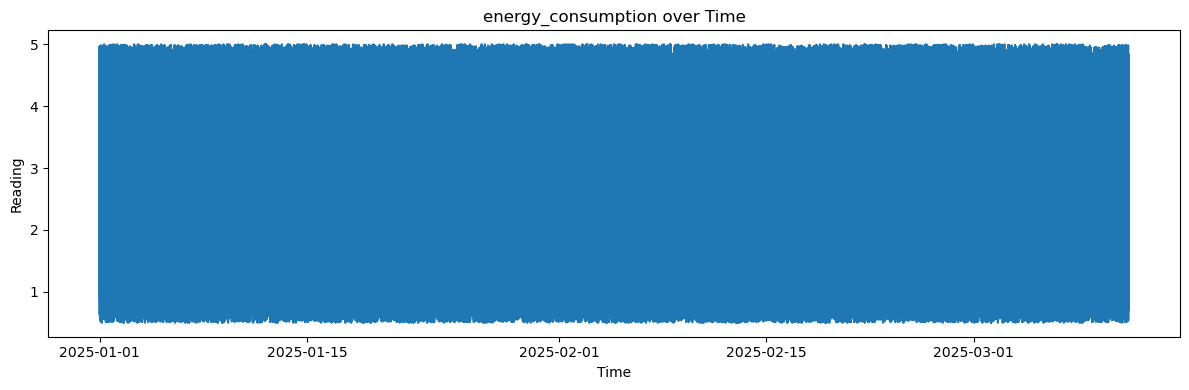

In [22]:
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.index, y=col, hue='status' if 'status' in df.columns else None)
    plt.title(f"{col} over Time")
    plt.xlabel("Time")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()

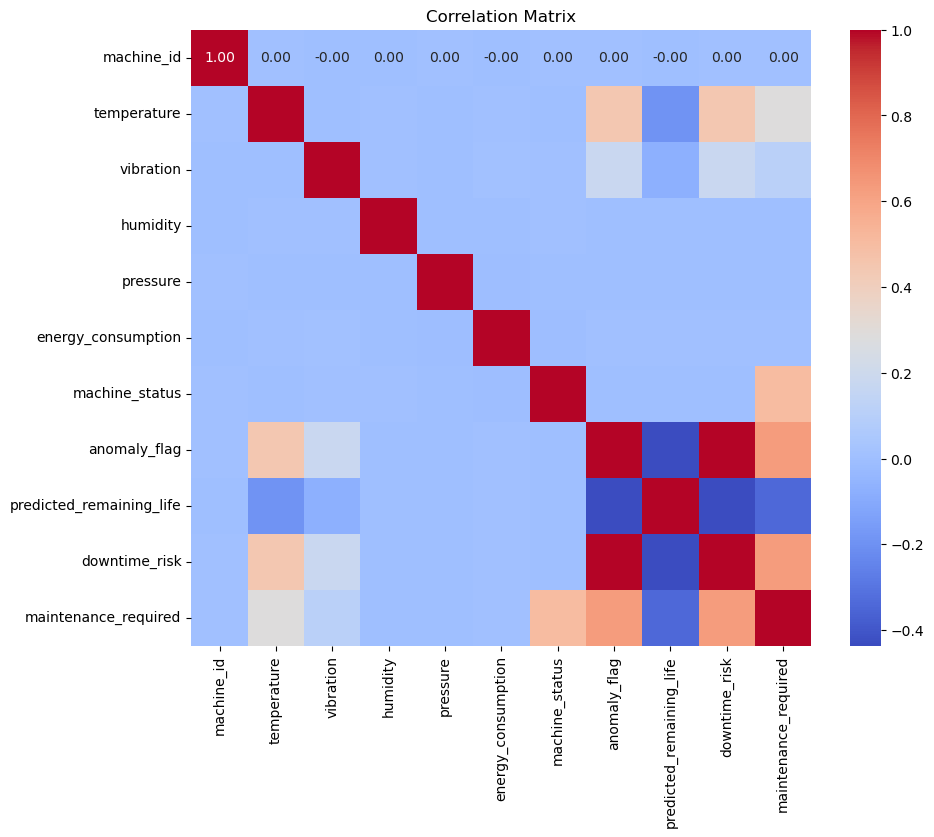

In [16]:
# --- Correlation Heatmap (Optional) ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


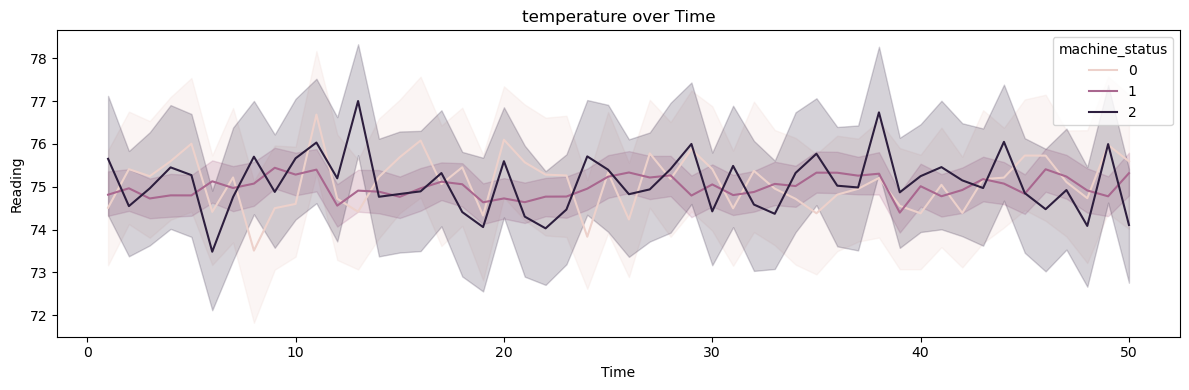

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


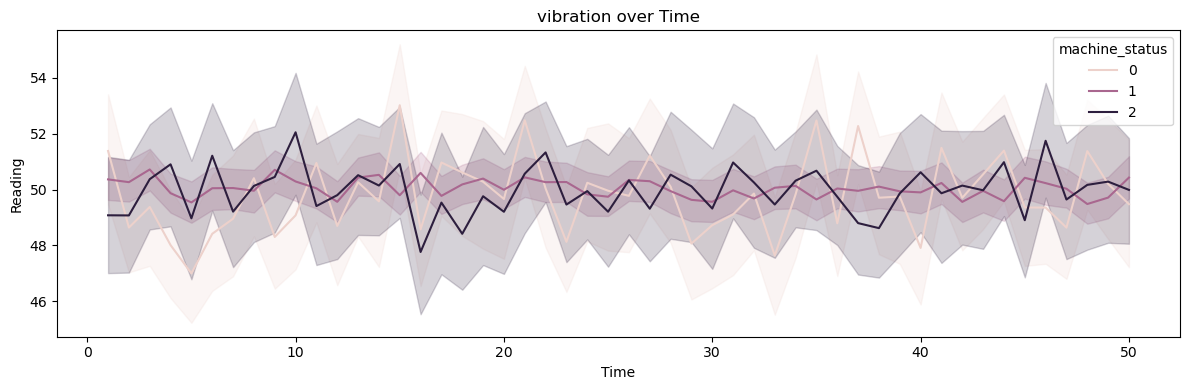

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


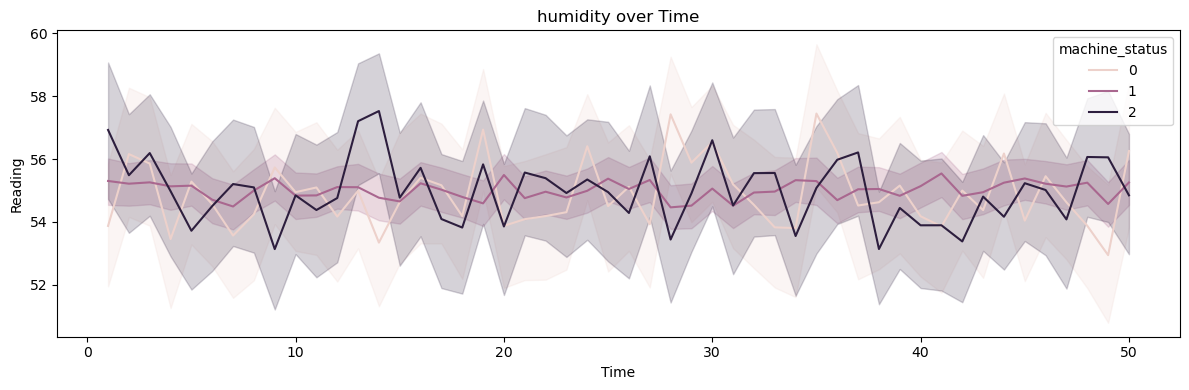

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


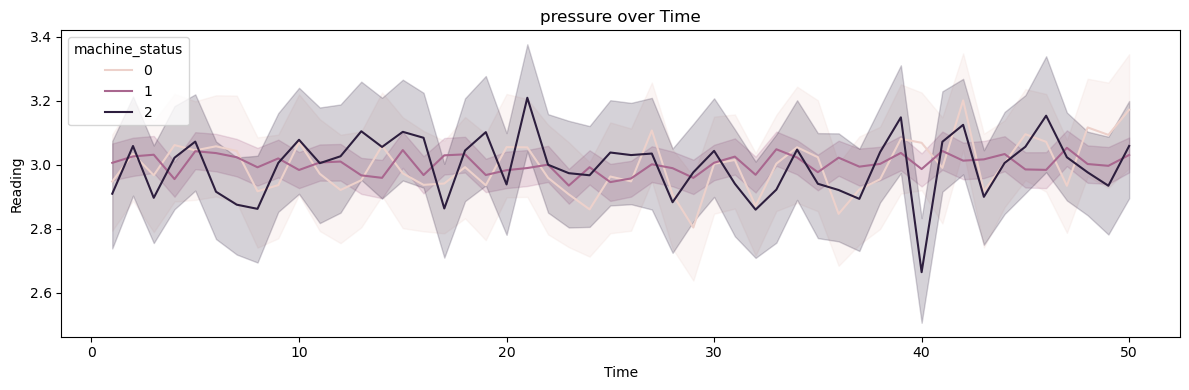

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


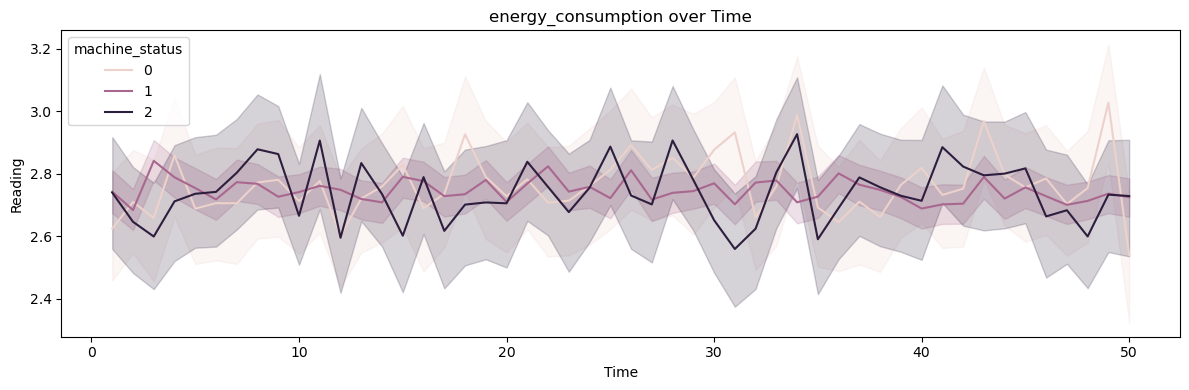

In [ ]:
# machine_status	anomaly_flag	predicted_remaining_life	downtime_risk	maintenance_required
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.machine_id, y=col, hue='machine_status' if 'machine_status' in df.columns else None)
    plt.title(f"{col} over Machine ID")
    plt.xlabel("Machine ID")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


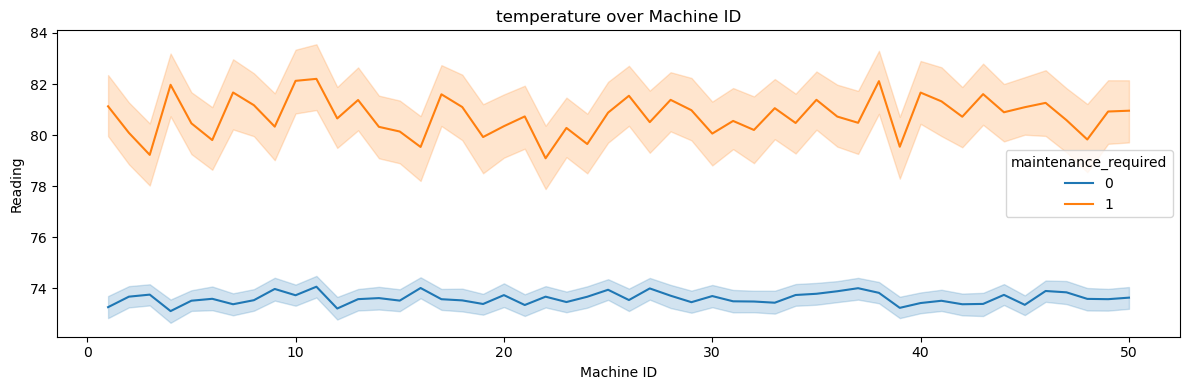

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


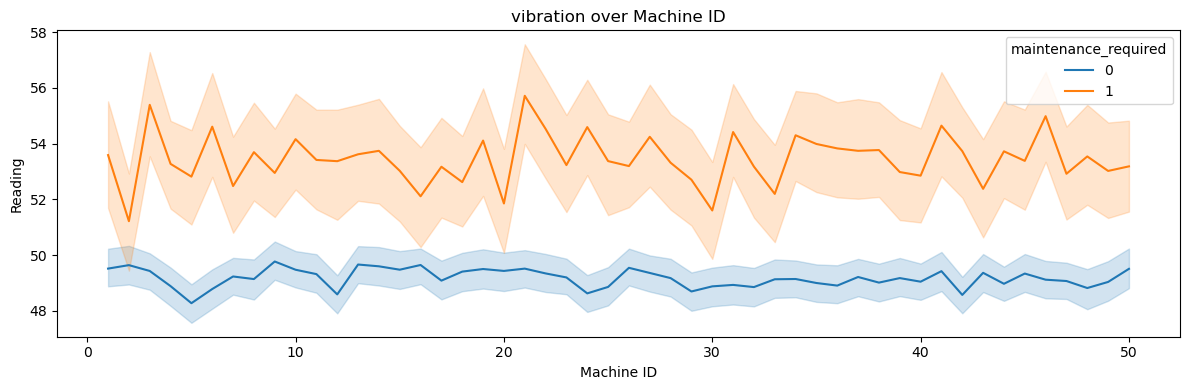

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


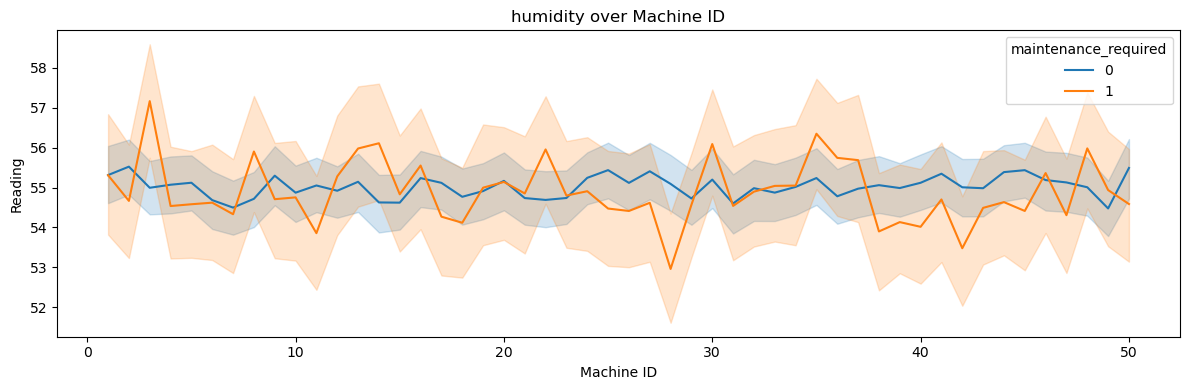

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


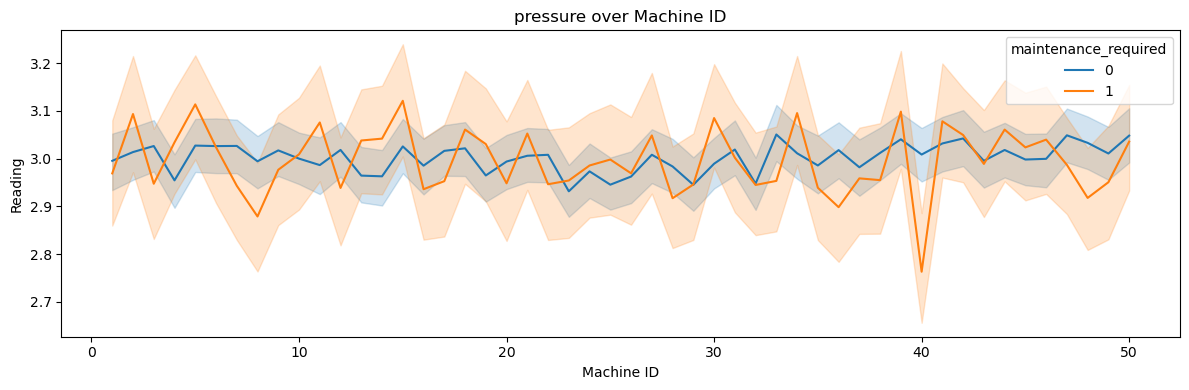

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


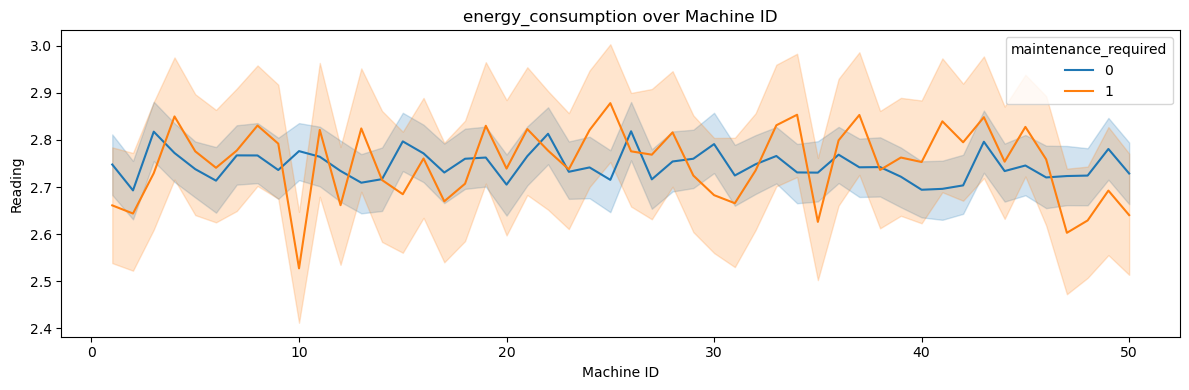

In [26]:
# machine_status	anomaly_flag	predicted_remaining_life	downtime_risk	maintenance_required
for col in sensor_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x=df.machine_id, y=col, hue='maintenance_required')
    plt.title(f"{col} over Machine ID")
    plt.xlabel("Machine ID")
    plt.ylabel("Reading")
    plt.tight_layout()
    plt.show()